___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___
# Linear Regression Project

Congratulations! You just got some contract work with an Ecommerce company based in New York City that sells clothing online but they also have in-store style and clothing advice sessions. Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want.

The company is trying to decide whether to focus their efforts on their mobile app experience or their website. They've hired you on contract to help them figure it out! Let's get started!

Just follow the steps below to analyze the customer data (it's fake, don't worry I didn't give you real credit card numbers or emails).

## Imports
** Import pandas, numpy, matplotlib,and seaborn. Then set %matplotlib inline 
(You'll import sklearn as you need it.)**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get the Data

We'll work with the Ecommerce Customers csv file from the company. It has Customer info, suchas Email, Address, and their color Avatar. Then it also has numerical value columns:

* Avg. Session Length: Average session of in-store style advice sessions.
* Time on App: Average time spent on App in minutes
* Time on Website: Average time spent on Website in minutes
* Length of Membership: How many years the customer has been a member. 

** Read in the Ecommerce Customers csv file as a DataFrame called customers.**

In [3]:
customers = pd.read_csv('Ecommerce Customers')

**Check the head of customers, and check out its info() and describe() methods.**

In [4]:
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [5]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [6]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


## Exploratory Data Analysis

**Let's explore the data!**

For the rest of the exercise we'll only be using the numerical data of the csv file.
___
**Use seaborn to create a jointplot to compare the Time on Website and Yearly Amount Spent columns. Does the correlation make sense?**


Pearson's correlation coefficient: -0.00
p-value: 0.95



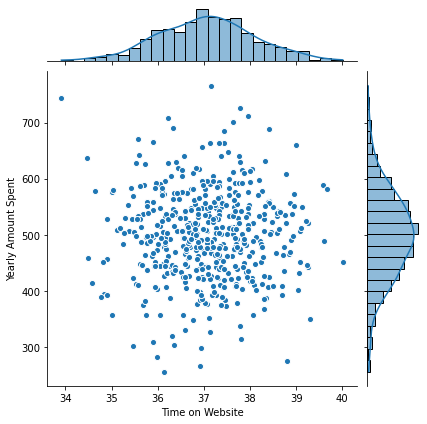

In [42]:
import scipy.stats as stats
r, p = stats.pearsonr(customers['Time on Website'], customers['Yearly Amount Spent'])
print("""
Pearson's correlation coefficient: {:.2f}
p-value: {:.2f}
""".format(r, p))
sns.jointplot(x='Time on Website', y='Yearly Amount Spent', data=customers,
             marker=".", s=150, marginal_kws=dict(bins=25, kde=True));

# Note from Ipython for interpreting these values:
# "The Pearson correlation coefficient measures the linear relationship
# between two datasets."
# "The p-value roughly indicates the probability of an uncorrelated system
# producing datasets that have a Pearson correlation at least as extreme
# as the one computed from these datasets."

# I believe the remark in the solutions that "more time on site, more money spent" is wrong. 
# The Pearson's correlation indicates that there is no linear relationship between these two attributes.
# The p-value is saying that 95% of the time we will get this distrubtion between these two attributes, i.e. 
# a non-linear one. One cannot conclude that more time spent on the site means more money spent. 

** Do the same but with the Time on App column instead. **


Pearson's correlation coefficient: 0.50
p-value: 6.905842369971329e-33



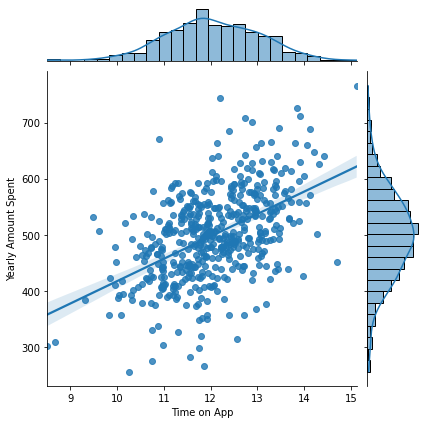

In [45]:
r, p = stats.pearsonr(customers['Time on App'], customers['Yearly Amount Spent'])
print("""
Pearson's correlation coefficient: {:.2f}
p-value: {}
""".format(r, p))
sns.jointplot(x='Time on App', y='Yearly Amount Spent', data=customers,
             kind='reg', marginal_kws=dict(bins=25, kde=True));
# Unlike the situation above, here we see that there is indeed a positive linear relationship
# between the two attributes, indicating that more time spent on the app means more money spent.
# The p-value indicates that this relationship is very unlikely to be due to chance, regardless if 
# our significance threshhold were 1% or 5%. 

** Use jointplot to create a 2D hex bin plot comparing Time on App and Length of Membership.**


Pearson's correlation coefficient: 0.029
p-value: 0.516



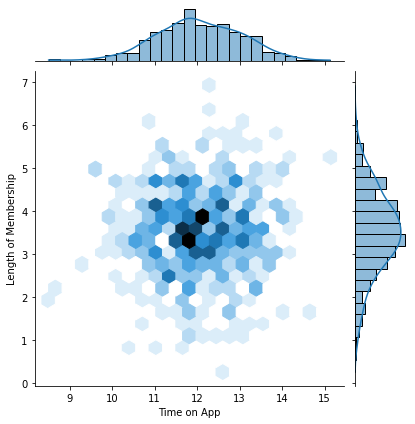

In [47]:
r, p = stats.pearsonr(customers['Time on App'], customers['Length of Membership'])
print("""
Pearson's correlation coefficient: {:.3f}
p-value: {:.3f}
""".format(r, p))
sns.jointplot(x='Time on App', y='Length of Membership', data=customers,
             kind='hex', marginal_kws=dict(bins=25, kde=True));

**Let's explore these types of relationships across the entire data set. Use [pairplot](https://stanford.edu/~mwaskom/software/seaborn/tutorial/axis_grids.html#plotting-pairwise-relationships-with-pairgrid-and-pairplot) to recreate the plot below.(Don't worry about the the colors)**

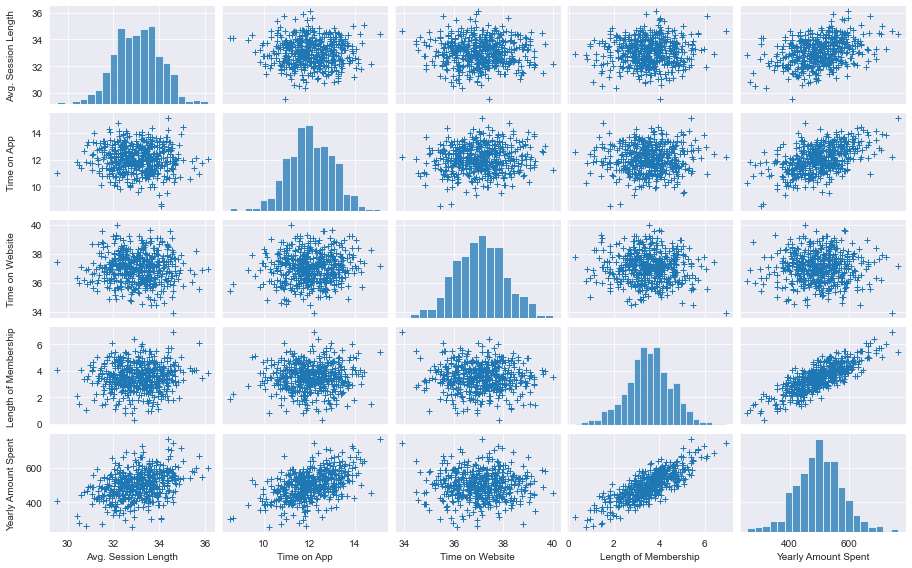

In [60]:
sns.set_style("darkgrid")
g = sns.pairplot(customers, height=1.6, aspect=1.6, plot_kws=dict(marker="+", linewidth=1))
for ax in g.axes[:,0]:
    ax.get_yaxis().set_label_coords(-0.2,0.5);

**Based off this plot what looks to be the most correlated feature with Yearly Amount Spent?**

In [61]:
# Length of Membership. Here we can quantify it:
r, p = stats.pearsonr(customers['Length of Membership'], customers['Yearly Amount Spent'])
print("""
Pearson's correlation coefficient: {:.2f}
p-value: {}
""".format(r, p))


Pearson's correlation coefficient: 0.81
p-value: 4.806615782583552e-117



**Create a linear model plot (using seaborn's lmplot) of  Yearly Amount Spent vs. Length of Membership. **

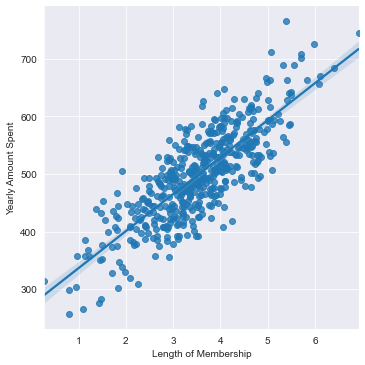

In [65]:
sns.lmplot(x='Length of Membership', y='Yearly Amount Spent', data=customers);

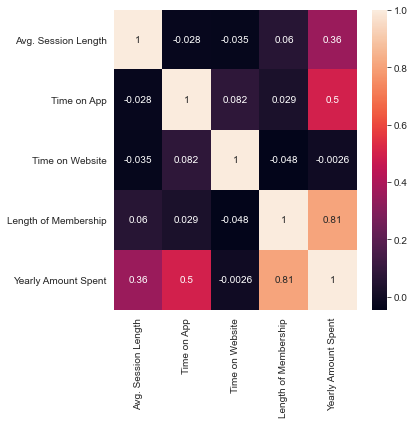

In [70]:
# Heatmap to show correlation between features
plt.figure(figsize=(6,6))
sns.heatmap(customers.corr(), annot=True)
plt.tight_layout();

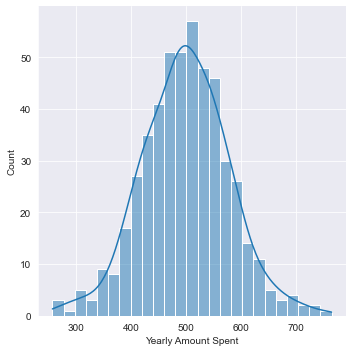

In [67]:
# Year amount spent will be the target data for the linear regression model
sns.displot(customers['Yearly Amount Spent'], kde=True, bins=25);

## Training and Testing Data

Now that we've explored the data a bit, let's go ahead and split the data into training and testing sets.
** Set a variable X equal to the numerical features of the customers and a variable y equal to the "Yearly Amount Spent" column. **

In [72]:
customers.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [86]:
customers.dtypes

Email                    object
Address                  object
Avatar                   object
Avg. Session Length     float64
Time on App             float64
Time on Website         float64
Length of Membership    float64
Yearly Amount Spent     float64
dtype: object

In [88]:
# features to train on
X = customers[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']] 
# target values
y = customers['Yearly Amount Spent'] 

** Use model_selection.train_test_split from sklearn to split the data into training and testing sets. Set test_size=0.3 and random_state=101**

In [80]:
from sklearn.model_selection import train_test_split

In [89]:
# Splitting data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Training the Model

Now its time to train our model on our training data!

** Import LinearRegression from sklearn.linear_model **

In [82]:
from sklearn.linear_model import LinearRegression

**Create an instance of a LinearRegression() model named lm.**

In [90]:
lm = LinearRegression() # Instantiating a LinearRegression object

** Train/fit lm on the training data.**

In [94]:
lm.fit(X_train,y_train); # Fit linear model

**Print out the coefficients of the model**

In [95]:
# print the intercept
print(lm.intercept_)

-1047.932782250239


In [96]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


## Predicting Test Data
Now that we have fit our model, let's evaluate its performance by predicting off the test values!

** Use lm.predict() to predict off the X_test set of the data.**

In [98]:
predicted = lm.predict(X_test)

** Create a scatterplot of the real test values versus the predicted values. **

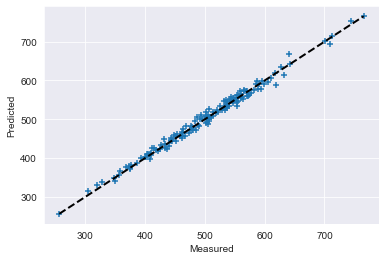

In [99]:
fig, ax = plt.subplots()
ax.scatter(y_test, predicted, marker='+')
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show();

## Evaluating the Model

Let's evaluate our model performance by calculating the residual sum of squares and the explained variance score (R^2).

** Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error. Refer to the lecture or to Wikipedia for the formulas**

In [102]:
from sklearn import metrics

In [103]:
print('MAE:', metrics.mean_absolute_error(y_test, predicted))
print('MSE:', metrics.mean_squared_error(y_test, predicted))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predicted)))

MAE: 7.228148653430806
MSE: 79.8130516509741
RMSE: 8.933815066978614


## Residuals

You should have gotten a very good model with a good fit. Let's quickly explore the residuals to make sure everything was okay with our data. 

**Plot a histogram of the residuals and make sure it looks normally distributed. Use either seaborn distplot, or just plt.hist().**

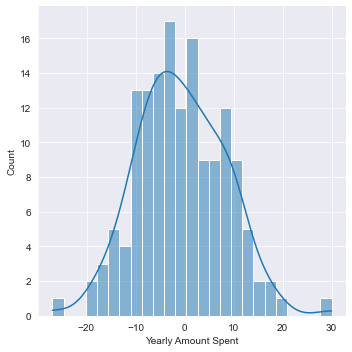

In [104]:
sns.displot((y_test-predicted),bins=25, kde=True);

## Conclusion
We still want to figure out the answer to the original question, do we focus our efforst on mobile app or website development? Or maybe that doesn't even really matter, and Membership Time is what is really important.  Let's see if we can interpret the coefficients at all to get an idea.

** Recreate the dataframe below. **

In [105]:
coeff_df

,Coefficient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


** How can you interpret these coefficients? **

The coefficients correspond to the slope of the linear fit, so the larger the coefficient, the stronger the increase.
For example, an increase of one unit of the average session length corresponds to an increase of $25.98 of yearly money spent.

**Do you think the company should focus more on their mobile app or on their website?**

Depends on what is desired. Apparently the app is working better than the website, so it is up to the stakeholders whether or not to focus more on the app or try to improve the website. 

## Great Job!

Congrats on your contract work! The company loved the insights! Let's move on.